In [ ]:
# enable if running in colab
!pip install git+https://github.com/patrickjohncyh/nlp_ml_api

In [1]:
# enable if running in colab
!mkdir datasets
!wget https://github.com/patrickjohncyh/nlp_ml_api/raw/master/datasets/corona_nlp.zip
!unzip corona_nlp.zip -d ./datasets/

In [1]:
import os
import pandas as pd
from nlp_ml_api.utils.model_utils import  get_available_models, deploy_model
from nlp_ml_api.datasets import C19TwitterSentimentDataset
from nlp_ml_api.Modeler import Modeler

In [2]:
df_train = pd.read_csv(os.path.join('datasets/corona_nlp', 'Corona_NLP_train.csv'), encoding="ISO-8859-1")
df_test = pd.read_csv(os.path.join('datasets/corona_nlp', 'Corona_NLP_test.csv'), encoding="ISO-8859-1")

In [3]:
# transform data to same format as _requirements_
training_data =[{'string':row['OriginalTweet'], 'labels':row['Sentiment']}
                  for _,row in  df_train[['OriginalTweet', 'Sentiment']].iterrows()]

testing_data =[{'string':row['OriginalTweet'], 'labels':row['Sentiment']}
                  for _,row in  df_test[['OriginalTweet', 'Sentiment']].iterrows()]

In [4]:
# load dataset
dataset = C19TwitterSentimentDataset.from_list(
    data_list_train=training_data,
    data_list_test=testing_data
)

In [5]:
# list available models
get_available_models()

['CountModel', 'TFIDFModel', 'TransformerModel']

In [6]:
# load Modeler with model and dataset
# Change to TransformerModel if running on colab!
modeler = Modeler('TFIDFModel', dataset)

In [7]:
# train model
modeler.train()

Train Accuracy: 0.629248291571754
Val Accuracy: 0.5775024295432458


============ Classification Report ============

                    precision    recall  f1-score   support

Extremely Negative       0.67      0.43      0.53       592
Extremely Positive       0.72      0.50      0.59       599
          Negative       0.50      0.54      0.52      1041
           Neutral       0.56      0.66      0.61       619
          Positive       0.50      0.62      0.55       947

          accuracy                           0.55      3798
         macro avg       0.59      0.55      0.56      3798
      weighted avg       0.57      0.55      0.55      3798

============ Error Analysis ============


Mis-classifications for Extremely Negative:

Text : Michigan residents can report any suspected price gouging or other violations of the Consumer Protection Act online during the #COVID19 #coronavirus pandemic (&amp; at any time) by visiting 

https://t.co/hxpM3nhLgw 

or by calling 877-765-8388.
Prediction: Negative

Text : NO #toiletpaper #handsanitizer #disinf

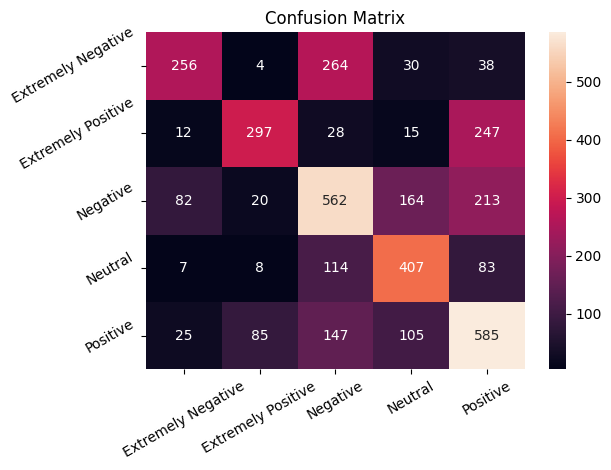

In [8]:
# evaluate on test set (split='train') to evaluate on train
eval_result = modeler.evaluate(split='test')

In [9]:
model = modeler.model

In [10]:
model.predict('Quarantine Day 5: I forgot how the outside world looks like anymore.')

array(['Positive'], dtype=object)

In [11]:
model.predict('Quarantine Day 129438: I am tired.')

array(['Negative'], dtype=object)

We can deploy onto localhost and invoke model via

`0.0.0.0/endpoint/?query=myquery`

(Do not run if on Colab)

Might take awhile as docker image needs to be built

In [17]:
deploy_model(model, mode='localhost')


docker-compose build prod
docker run --name endpoint -p 80:80 endpoint/endpoint:latest-prod
docker rm endpoint
endpoint


Building prod
#1 [internal] load build definition from Dockerfile
#1 sha256:e5cbd06a96e5a2e7e5305516b3ead4416ca4aefb749c84d948e5e966153cbcf3
#1 transferring dockerfile: 37B done
#1 DONE 0.0s

#2 [internal] load .dockerignore
#2 sha256:62e30cf73885e6d5176470136d5d2aaca9bab5f248f01a66176dde504ec782bb
#2 transferring context: 2B done
#2 DONE 0.0s

#3 [internal] load metadata for docker.io/library/python:3.8
#3 sha256:edad251955f644c6004999f0af04035912392fa02db26821676452becbc715fb
#3 DONE 1.6s

#4 [base 1/5] FROM docker.io/library/python:3.8@sha256:847e11fb960908cda335c55495dcaf4bc10559e03abdd9a086a20644327e64a5
#4 sha256:9efb27566f53551f4014879971f00b8d9e53b7c4f77dc6e319ab60bbf5b92e21
#4 resolve docker.io/library/python:3.8@sha256:847e11fb960908cda335c55495dcaf4bc10559e03abdd9a086a20644327e64a5 done
#4 DONE 0.0s

#6 [internal] load build context
#6 sha256:6fc607d3550a04dd28a22613b21d2495212f7ae55331f62bd993313660a54f5d
#6 transferring context: 7.02MB 0.2s done
#6 DONE 0.2s

#7 [base 3/5]